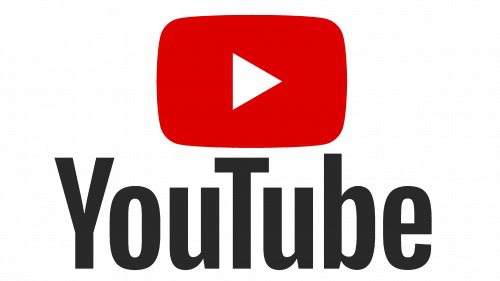

In [1]:
from IPython.display import display
from PIL import Image
img = Image.open("youtube.jpg")
display(img)

# Project Title : Top 100 YouTube Channels in 2024

# About Dataset

This dataset showcases the top 100 YouTube channels in 2024, including key metrics such as subscribers, total views, and video count. It has been manually curated to provide a snapshot of the leading channels as of December 2024. The data reflects the performance of channels across various genres, from entertainment to educational content, offering insights into the most influential creators of the year. This data is useful for marketers, content creators, and data scientists who want to analyze trends, audience engagement, and growth strategies of top YouTube influencers. By examining these metrics, users can gain valuable insights into content creation, viewer preferences, and platform dynamics. The dataset is based on publicly available YouTube statistics and third-party platforms, ensuring transparency and accuracy.

In [42]:
# Libraries to use for Data cleaning, numbers, and plotting Charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the Dataset
youtube = pd.read_csv('YOUTUBE CHANNELS DATASET.csv')

In [9]:
youtube

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN
...,...,...,...,...,...,...
96,97.0,Voce Sabia,46M,"1,714","8,180,068,059",BR
97,98.0,Katy Perry,45.6M,170,"27,616,850,074",US
98,99.0,Speed Records,45.5M,"11,880","30,587,436,800",IN
99,100.0,Zhong,45.5M,"1,861","17,998,163,730",US


In [10]:
# str.replace('M',''): Removes the letter 'M' from the values.
# .astype(float): Converts the remaining numeric string to a float.
# * 1_000_000: Converts the number to its actual integer value by multiplying by one million.
youtube['Subscribers'] = youtube['Subscribers'].str.replace('M','').astype(float) * 1_000_000

In [11]:
# Clean 'Uploads', and 'Views' columns
for col in ['Uploads', 'Views']:
    if col in youtube.columns:
        youtube[col]= pd.to_numeric(youtube[col].astype(str).str.replace(',',''), errors='coerce')

In [12]:
print(youtube.to_string())

     Ranking                         Username  Subscribers   Uploads         Views Country
0        1.0                          MrBeast  336000000.0     838.0  6.685363e+10      US
1        2.0                         T-Series  281000000.0   22313.0  2.772428e+11      IN
2        3.0         Cocomelon-Nursery Rhymes  186000000.0    1370.0  1.943618e+11      US
3        4.0                   Youtube Movies  185000000.0       0.0  0.000000e+00     NaN
4        5.0                        Set India  180000000.0  148727.0  1.727090e+11      IN
5        6.0                      Vlad & Niki  129000000.0     796.0  9.929150e+10      US
6        7.0                  Kids Diana Show  128000000.0    1282.0  1.089879e+11      US
7        8.0                      Like Nastya  124000000.0     918.0  1.081285e+11      US
8        9.0                            Music  121000000.0       0.0  0.000000e+00     NaN
9       10.0                Zee Music Company  112000000.0   12787.0  7.209135e+10      IN

In [13]:
# Display first 5 rows of the dataset
youtube.head()

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336000000.0,838.0,6.685363e+10,US
1,2.0,T-Series,281000000.0,22313.0,2.772428e+11,IN
2,3.0,Cocomelon-Nursery Rhymes,186000000.0,1370.0,1.943618e+11,US
3,4.0,Youtube Movies,185000000.0,0.0,0.000000e+00,NaN
4,5.0,Set India,180000000.0,148727.0,1.727090e+11,IN


In [14]:
# Display last 5 rows of the dataset
youtube.tail()

,Ranking,Username,Subscribers,Uploads,Views,Country
96,97.0,Voce Sabia,46000000.0,1714.0,8.180068e+09,BR
97,98.0,Katy Perry,45600000.0,170.0,2.761685e+10,US
98,99.0,Speed Records,45500000.0,11880.0,3.058744e+10,IN
99,100.0,Zhong,45500000.0,1861.0,1.799816e+10,US
100,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Display basic information of the dataset
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ranking      100 non-null    float64
 1   Username     100 non-null    object 
 2   Subscribers  100 non-null    float64
 3   Uploads      100 non-null    float64
 4   Views        100 non-null    float64
 5   Country      94 non-null     object 
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


In [16]:
# Display summary statistic
youtube.describe()

,Ranking,Subscribers,Uploads,Views
count,100.000000,1.000000e+02,100.000000,1.000000e+02
mean,50.500000,7.323800e+07,25681.220000,4.054367e+10
std,29.011492,4.449087e+07,72524.113223,4.033800e+10
min,1.000000,4.550000e+07,0.000000,0.000000e+00
25%,25.750000,5.005000e+07,717.250000,1.964624e+10
50%,50.500000,5.995000e+07,1891.000000,3.078494e+10
75%,75.250000,7.447500e+07,7028.000000,4.472049e+10
max,100.000000,3.360000e+08,433181.000000,2.772428e+11


In [17]:
# Checking for missing values
missing_values = youtube.isnull().sum()
missing_values

Ranking        1
Username       1
Subscribers    1
Uploads        1
Views          1
Country        7
dtype: int64

In [18]:
# Drop rows with all missing values(if any)
youtube.dropna(how='all',inplace=True)

In [19]:
# Checking for duplicates
duplicates = youtube.duplicated().sum()
duplicates

0

In [20]:
# Drop duplicates
if duplicates > 0:
    youtube.drop_duplicates(inplace=True)

# Correlation Analysis
Correlation Analysis is a technique used to measure the relationship between two or more numerical variables. it helps determine if an increase or decrease in one variable is associated with an increase or decrease in another.

In [32]:
numeric_data = youtube.select_dtypes(include=['float64', 'int64'])

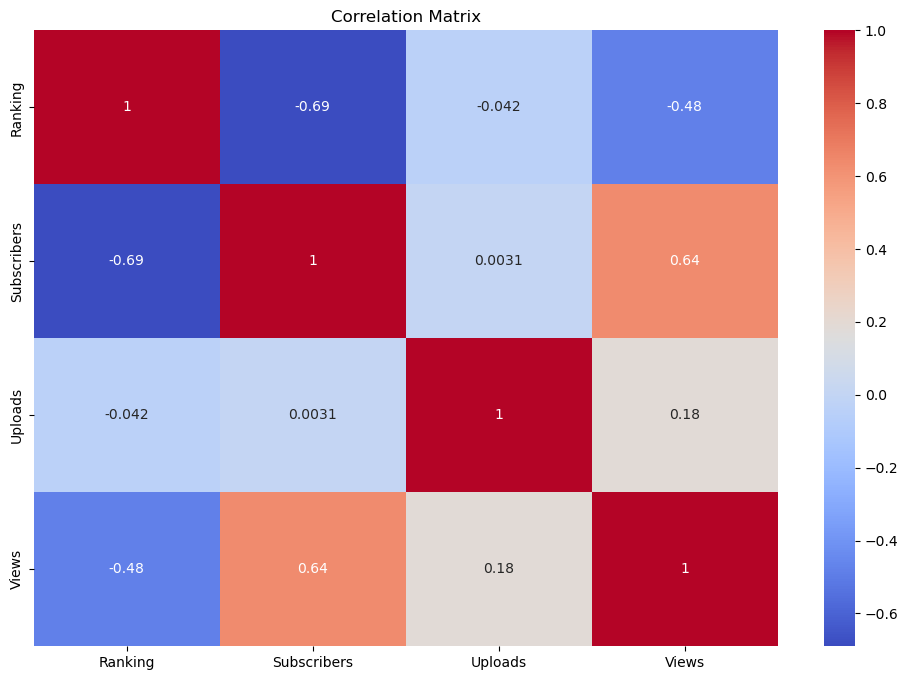

In [33]:
# Correalation can only be done with numbers not strings
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Uploads
The Distribution of Uploads refers to how the number of uploads by YouTube channels is spread out across the entire dataset.
- When you plot the distribution of uploads (using a histogram), you are visualizing:
- How frequently certain upload counts appear.
- The shape of the distribution (e.g., normal, skewed, etc.).
- The range of uploads, from channels with few uploads to those with massive uploads.

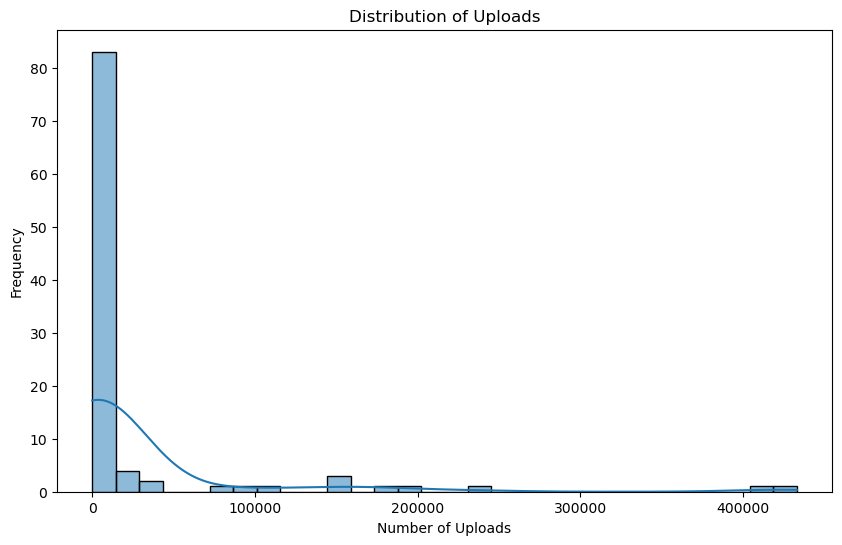

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(youtube['Uploads'],bins=30,kde=True)
plt.title('Distribution of Uploads')
plt.xlabel('Number of Uploads')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Checking column names
print('Column Names:',youtube.columns.tolist())

Column Names: ['Ranking', 'Username', 'Subscribers', 'Uploads', 'Views', 'Country']


# Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is the process of examining and visualizing a dataset to discover patterns, identify anomalies, test hypotheses, and check assumptions using statistical and graphical methods. The primary objectives of EDA are:

- Understanding Data Structure: Learning about the dataset's variables, their types, and general statistics.

- Data Cleaning: Handling missing values, duplicates, and incorrect data entries.

- Identifying Patterns: Finding trends, correlations, or distributions within the data.

- Hypothesis Generation: Creating potential relationships or insights for further analysis.

- Data Visualization: Using graphs, charts, and plots to present findings effectively.


# 1. Top 10 Most Subscribed Channels:

In [25]:
# Displays the top 10 channels with the highest number of subscribers.
top_subs = youtube.nlargest(10, 'Subscribers')
print('\nTop 10 Most Subscribed Channels:')
print(top_subs[['Username','Subscribers']])


Top 10 Most Subscribed Channels:
                   Username  Subscribers
0                   MrBeast  336000000.0
1                  T-Series  281000000.0
2  Cocomelon-Nursery Rhymes  186000000.0
3            Youtube Movies  185000000.0
4                 Set India  180000000.0
5               Vlad & Niki  129000000.0
6           Kids Diana Show  128000000.0
7               Like Nastya  124000000.0
8                     Music  121000000.0
9         Zee Music Company  112000000.0


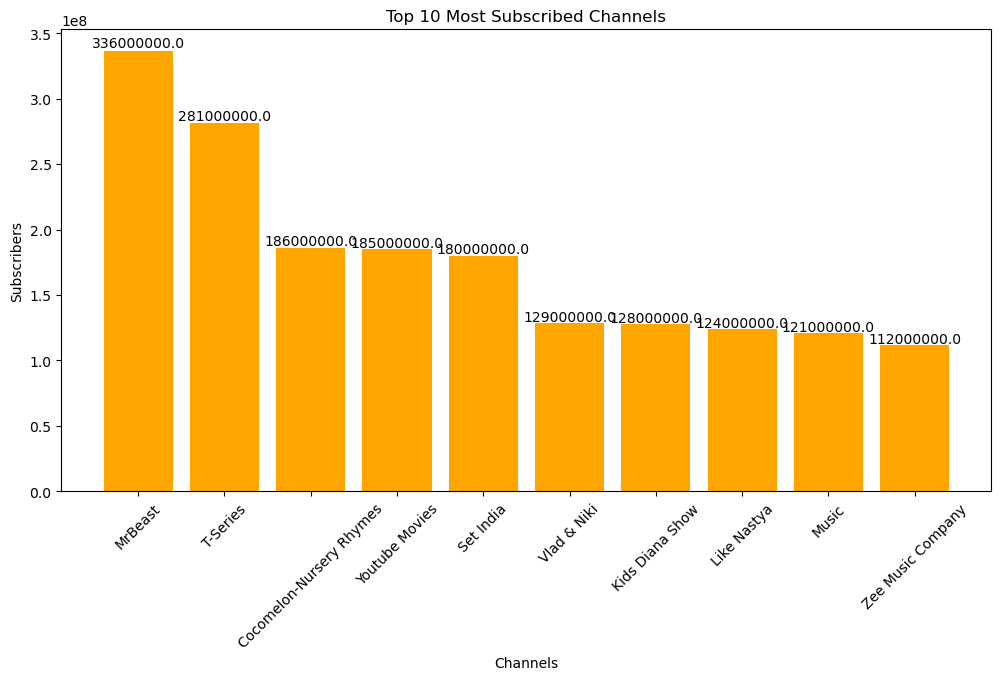

In [26]:
# Plotting the top 10 most subsribed channels
plt.figure(figsize=(12, 6))
plt.bar(top_subs['Username'], top_subs['Subscribers'], color='orange')
plt.xticks(rotation=45)
plt.title('Top 10 Most Subscribed Channels')
plt.xlabel('Channels')
plt.ylabel('Subscribers')

# Adding data labels
for i, v in enumerate(top_subs['Subscribers']):
    plt.text(i,v+0.01 * v,str(v), ha='center')
plt.show()

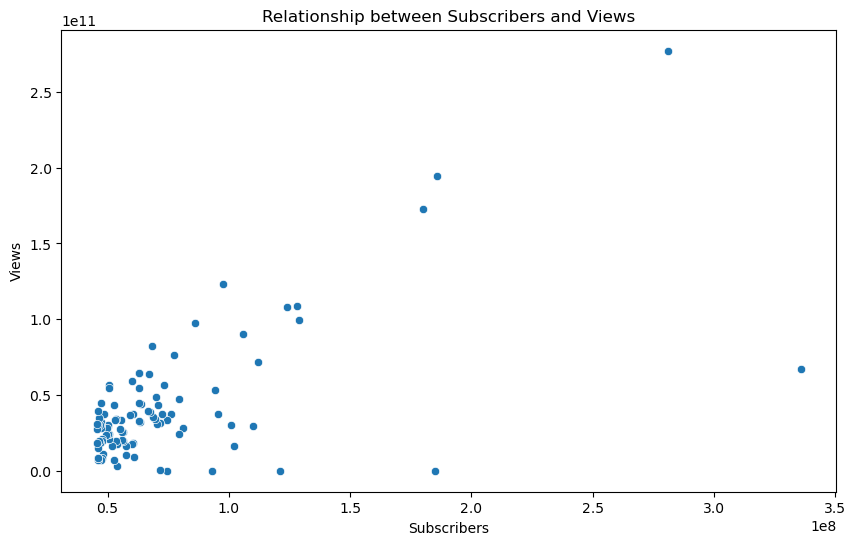

In [27]:
# The relationship between Subscribers and Viewers:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=youtube['Subscribers'],y=youtube['Views'])

# Labelsnand Title
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.title('Relationship between Subscribers and Views')

# Show plot
plt.show()

In [ ]:
# if the points form an upward trend it means the subscribers leads to more views
# if it is randomly scattered it means there is no strong correlation between Subscribers & Views
# when there is a cluster of points , it means there is a positive correlation

# Correlation the Correlation Coefficient
To measure the strength of the relationship, you can compute the correlation coefficient:

In [35]:
correlation = youtube['Subscribers'].corr(youtube['Views'])
print(f"Correlation Coefficient: {correlation}")
# A value close to 1 strong positive correlation
# A value close to 0 week or no correlation 
# A value close to -1 strong negative correlation


Correlation Coefficient: 0.6360606485061654


In [38]:
# Top 10 Channels with the Highest Views:
top_10_channels = youtube.sort_values(by="Views", ascending =False).head(10)

# Display th result
print(top_10_channels[['Username','Views']])

                    Username         Views
1                   T-Series  2.772428e+11
2   Cocomelon-Nursery Rhymes  1.943618e+11
4                  Set India  1.727090e+11
14                  Sony SAB  1.231728e+11
6            Kids Diana Show  1.089879e+11
7                Like Nastya  1.081285e+11
5                Vlad & Niki  9.929150e+10
18                    Zee TV  9.756699e+10
11                       WWE  9.016718e+10
35             Toys & Colors  8.239180e+10


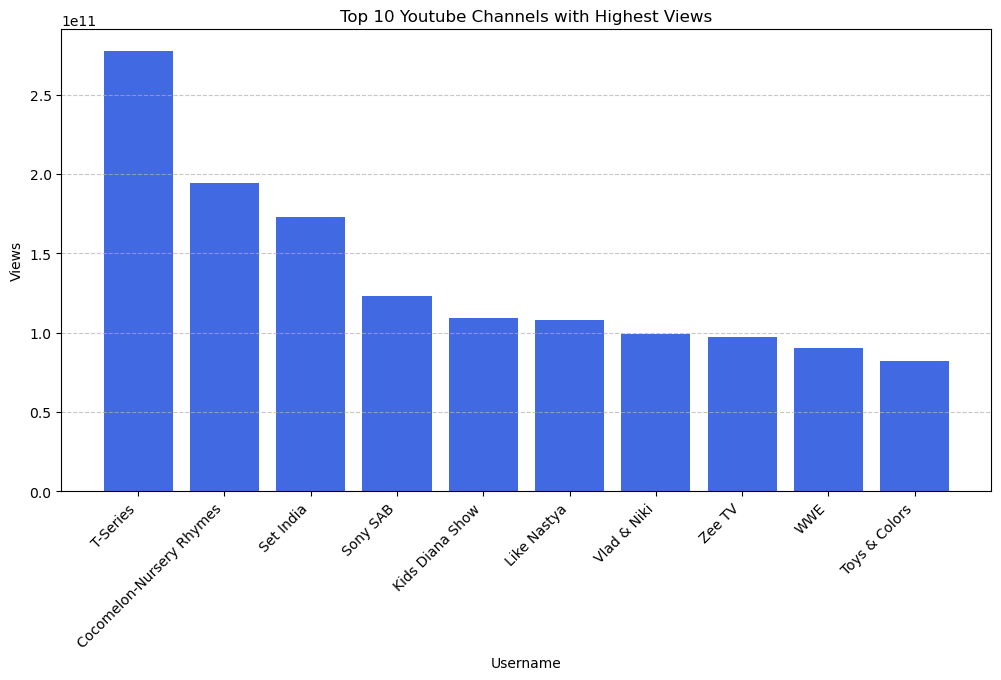

In [47]:
# Plot the Column Chart
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(top_10_channels["Username"],top_10_channels["Views"],color="royalblue")

# Customize the chart
plt.xticks(rotation=45, ha="right") # Rotate chnnel names for better readability
plt.ylabel("Views")
plt.xlabel("Username")
plt.title("Top 10 Youtube Channels with Highest Views")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [49]:
# Top 10 Channels with the Highest Uploads:
top_10_channels = youtube.sort_values(by="Uploads", ascending =False).head(10)

# Display the result
print(top_10_channels[['Username','Uploads']])

                 Username   Uploads
90               ABP NEWS  433181.0
34                Aaj Tak  415087.0
69  ABS-CBN Entertainment  234889.0
18                 Zee TV  190672.0
22              Colors TV  179052.0
50         ARY Digital HD  155545.0
41            HAR PAL GEO  152148.0
4               Set India  148727.0
71               StarPlus  111513.0
14               Sony SAB   94136.0


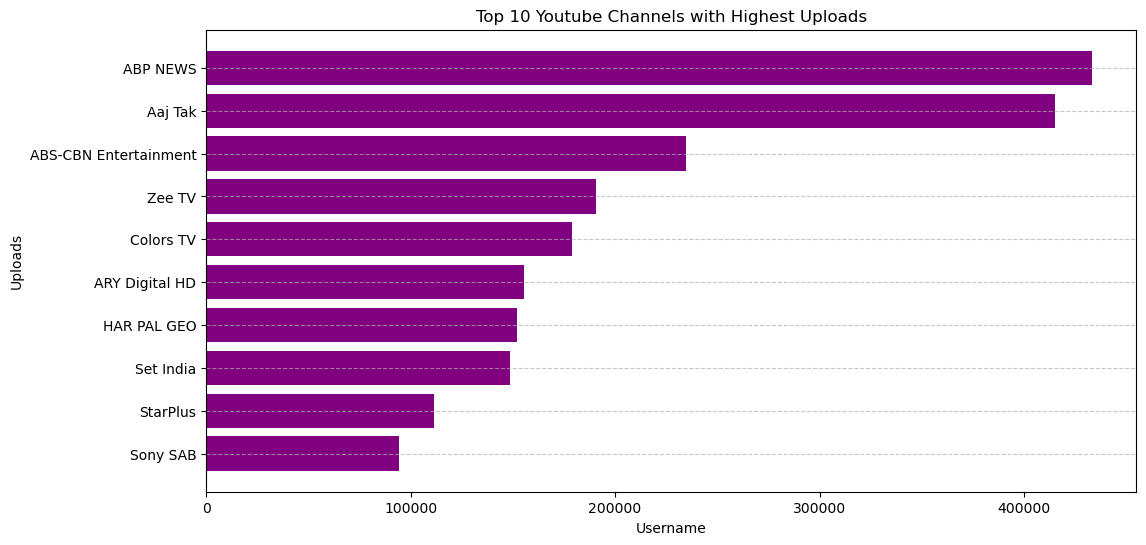

In [53]:
# Plot the Column Chart
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(top_10_channels["Username"],top_10_channels["Uploads"],color="purple")

# Customize the chart
plt.gca().invert_yaxis() # Invert the y-axis to show highest first
plt.ylabel("Uploads")
plt.xlabel("Username")
plt.title("Top 10 Youtube Channels with Highest Uploads")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [55]:
# Top 10 countries by Views, Subscribers, and Uploads
country_stats = youtube.groupby("Country").sum()
country_stats                                
                                

,Ranking,Username,Subscribers,Uploads,Views
Country,,,,,
AE,204.0,ZAMZAM ELECTRONIC TRADINGshfa2shfa,1.640000e+08,22274.0,9.254359e+10
AR,96.0,El Reino InfantilAlejo lgoa,1.230000e+08,2825.0,8.429834e+10
BR,388.0,Canal KondzillaLUCCAS NETO - LICCAS TOONFelipe...,2.567000e+08,13982.0,1.253161e+11
CA,26.0,Justin Bieber,7.440000e+07,249.0,3.363673e+10
CL,68.0,JuegaGerman,5.190000e+07,2264.0,1.619051e+10
CO,85.0,Shakira,4.730000e+07,362.0,3.191152e+10
ES,64.0,Mikecrack,5.340000e+07,2072.0,1.954208e+10
GB,59.0,Ed Sheeran,5.560000e+07,538.0,3.342412e+10
ID,147.0,Jess No LimitRicis Official,1.003000e+08,7701.0,1.517910e+10


In [57]:
# Get the top 5 countries based on Views, Subscribers, and Uploads
top_5_views = country_stats.sort_values(by="Views",ascending=False).head(5)
top_5_views

,Ranking,Username,Subscribers,Uploads,Views
Country,,,,,
IN,1301.0,T-SeriesSet IndiaZee Music CompanyGoldminesSon...,2.175600e+09,1759190.0,1.566694e+12
US,1233.0,MrBeastCocomelon-Nursery RhymesVlad & NikiKids...,2.241800e+09,74561.0,1.215223e+12
KR,88.0,BlackpinkBANGTANTYHYBE LABELSKIMPRO,3.243000e+08,9110.0,1.556593e+11
BR,388.0,Canal KondzillaLUCCAS NETO - LICCAS TOONFelipe...,2.567000e+08,13982.0,1.253161e+11
PK,93.0,HAR PAL GEOARY Digital HD,1.228000e+08,307693.0,1.235406e+11


C:\Users\DELL\AppData\Local\Temp\ipykernel_9164\3086057188.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_5_views.index, rotation=45)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9164\3086057188.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_5_subscribers.index, rotation=45)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9164\3086057188.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(top_5_uploads.index, rotation=45)


[Text(0, 0, 'IN'),
 Text(1, 0, 'PK'),
 Text(2, 0, 'PH'),
 Text(3, 0, 'US'),
 Text(4, 0, 'MX')]

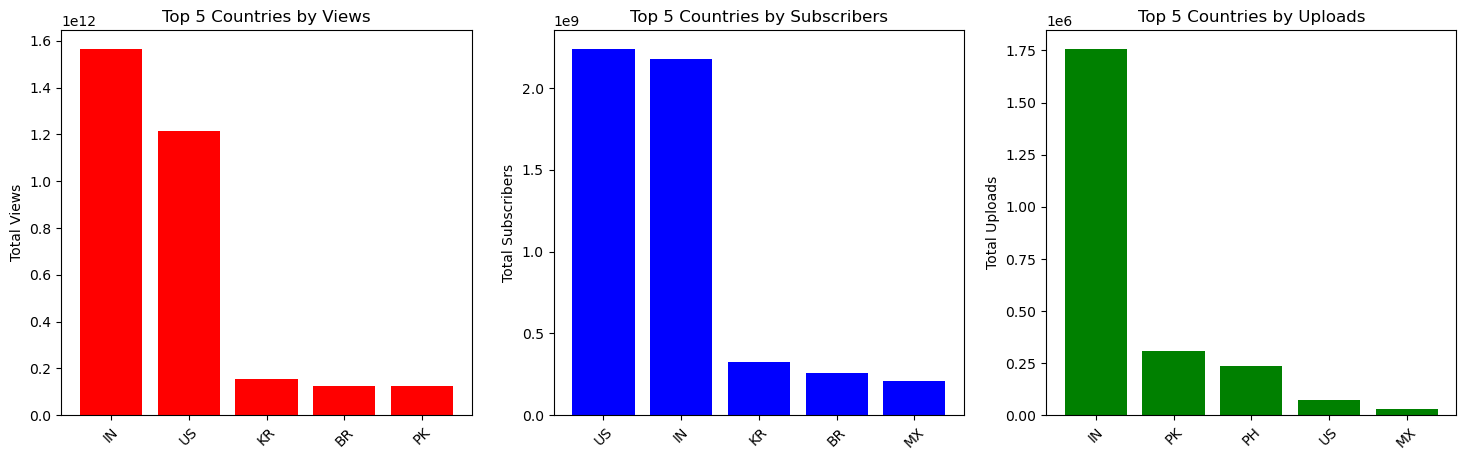

In [71]:
# Get the top 5 countries based on Views, Subscribers, and Uploads
top_5_views = country_stats.sort_values(by="Views",ascending=False).head(5)
top_5_subscribers = country_stats.sort_values(by="Subscribers",ascending=False).head(5)
top_5_uploads = country_stats.sort_values(by="Uploads",ascending=False).head(5)

# Plot the results
fig, axes = plt.subplots(1,3, figsize=(18,5))

# Views
axes[0].bar(top_5_views.index, top_5_views["Views"], color='red')
axes[0].set_title("Top 5 Countries by Views")
axes[0].set_ylabel("Total Views")
axes[0].set_xticklabels(top_5_views.index, rotation=45)

# Subscribers
axes[1].bar(top_5_subscribers.index, top_5_subscribers["Subscribers"], color='blue')
axes[1].set_title("Top 5 Countries by Subscribers")
axes[1].set_ylabel("Total Subscribers")
axes[1].set_xticklabels(top_5_subscribers.index, rotation=45)

# Uploads
axes[2].bar(top_5_uploads.index, top_5_uploads["Uploads"], color='green')
axes[2].set_title("Top 5 Countries by Uploads")
axes[2].set_ylabel("Total Uploads")
axes[2].set_xticklabels(top_5_uploads.index, rotation=45)